In [3]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, u_darrays as uda, u_met
import glob
import metpy
from metpy import calc
from metpy.units import units
from scipy import stats
import metpy
from metpy import calc
from metpy.units import units
import pickle as pkl

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [2]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [4]:
ml = 0.5
regions = {
'equatorial' : [(-5,0),(-78.25+ml, -73.75)],
'transition' : [(-8,-5), (-77.25+ml, -72.75)],
'central' : [(-12,-8), (-75.5+ml, -71.0)],
'southern' : [(-18,-15),  (-66.25+ml, -61.75)]}
h = 2000

In [5]:
topo_full = xr.open_dataset('/media/ck/Elements/SouthAmerica/ERA5/hourly/ERA5_static_hourly_0.25deg_peru.nc')
topo_full = uda.flip_lat(topo_full)

In [6]:
height = xr.open_dataset('/media/ck/Elements/SouthAmerica/ERA5/hourly/topo_ERA5_peru.nc')['h']


In [9]:
qup_l = []
qlow_l =[]
d_l = []
v_l = []
u_l = []
t_l = []
tcw_l = []
cape_l = []


################################################
for rr in ['equatorial', 'transition', 'central', 'southern']:
    srf = xr.open_mfdataset('/media/ck/Elements/SouthAmerica/ERA5/hourly/*_'+rr+'*_timeseries.nc')
    pll = xr.open_mfdataset('/media/ck/Elements/SouthAmerica/ERA5/hourly/*_'+rr+'*_timeseries_pl.nc')
    
    qup_l.append(pll['q'].sel(level=650))
    qlow_l.append(pll['q'].sel(level=850))
    #d_l.append(pll['d'].sel(level=850))
    v_l.append(pll['u'].sel(level=850))
    u_l.append(pll['u'].sel(level=200))
    t_l.append(pll['t'].sel(level=850))
    tcw_l.append(srf['tcwv'])
    cape_l.append(srf['cape'])
    
    
    

OSError: no files to open

In [8]:
len(cape_l)

3

In [1]:
regtag = ['equatorial', 'transition', 'central', 'southern']
f = plt.figure(figsize=(18,5), dpi=200)

for ids, ps in enumerate(qlow_l):
    ax = f.add_subplot(1,4,ids+1)
    
    tc = tcw_l[ids]
    uw = u_l[ids]
    cape = cape_l[ids]
    vv = v_l[ids]
    
    xx =0
    
    qstd = (ps.groupby('hour')-ps.isel(times=slice(0+xx,8+xx)).swap_dims({'times':'hour'})).rolling(times=3, min_periods=1, center=True).mean()
    qstd = qstd.values/np.std(qstd.values)
    
    tcstd = (tc.groupby('hour')-tc.isel(times=slice(0+xx,8+xx)).swap_dims({'times':'hour'})).rolling(times=3, min_periods=1, center=True).mean()
    tcstd = tcstd.values/np.std(tcstd.values)
    
    castd = (cape.groupby('hour')-cape.isel(times=slice(0+xx,8+xx)).swap_dims({'times':'hour'})).rolling(times=3, min_periods=1, center=True).mean()
    castd = castd.values/np.std(castd.values)
    
    vstd = (vv.groupby('hour')-vv.isel(times=slice(0+xx,8+xx)).swap_dims({'times':'hour'})).rolling(times=3, min_periods=1, center=True).mean()
    vstd = vstd.values/np.std(vstd.values)
            
    ustd = (uw.groupby('hour')-uw.isel(times=slice(0+xx,8+xx)).swap_dims({'times':'hour'})).rolling(times=3, min_periods=1, center=True).mean()
    ustd = ustd.values/np.std(ustd.values)
    
            
    ax.plot(qstd, label='q_low')
    ax.plot(tcstd, label='tcw_low')
    ax.plot(castd, label='cape', marker='o', markersize=2)
    ax.plot(vstd, label='jet')
    ax2 = ax.twinx()
    ax2.plot(ustd,color='k')
    
    #ax.axvline(4*8+5, color='grey')
#     for lo in np.arange(6):
#         ax.axvline(lo*8+5, color='grey')
    ax.axvline(4*8+2, color='k', linestyle='dashed')
    ax.axvline(5*8+2, color='k', linestyle='dashed')
    ax.axhline(0, color='k', linestyle='dashed')

    ax.set_ylim(-3,3)
    ax2.set_ylim(-4,4)
ax.legend()

NameError: name 'plt' is not defined

/home/ck/miniconda3/lib/python3.7/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing with an out-of-order index is generating 10 times more chunks
  return self.array[key]
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing with an out-of-order index is generating 10 times more chunks
  return self.array[key]
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing with an out-of-order index is generating 10 times more chunks
  return self.array[key]
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing with an out-of-order index is generating 10 times more chunks
  return self.array[key]
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing with an out-of-order index is generating 10 times more chunks
  return self.array[key]
/home/ck/miniconda3/lib/python3.7/s

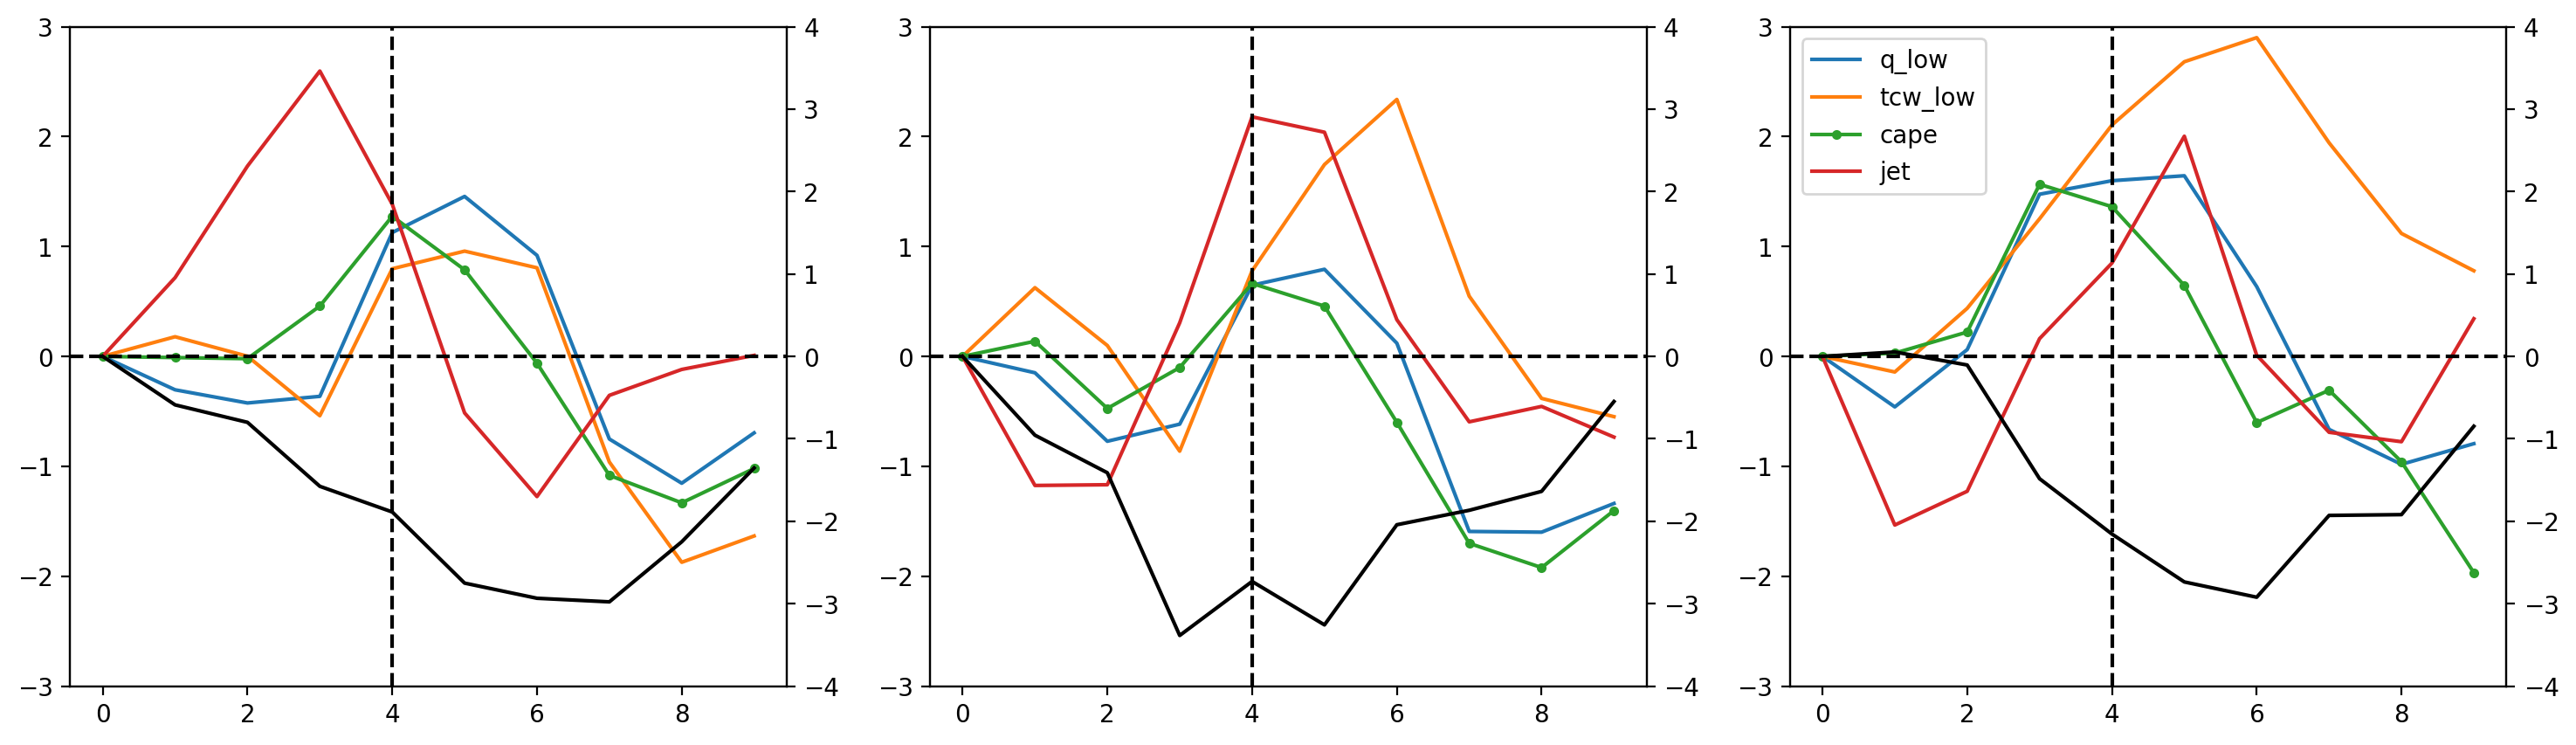

In [62]:
regtag = ['equatorial', 'central', 'southern']
f = plt.figure(figsize=(18,5), dpi=200)

for ids, ps in enumerate(qlow_l):
    ax = f.add_subplot(1,3,ids+1)
    
    tc = tcw_l[ids]
    uw = u_l[ids]
    cape = cape_l[ids]
    vv = v_l[ids]
    
    xx =0
    
    start = 5   # 5 = (10UTC)
    
    qstd = (ps.groupby('hour')-ps.isel(times=slice(0+xx,8+xx)).swap_dims({'times':'hour'})).rolling(times=3, min_periods=1, center=True).mean()
    qstd = qstd.values/np.std(qstd.values)
    
    tcstd = (tc.groupby('hour')-tc.isel(times=slice(0+xx,8+xx)).swap_dims({'times':'hour'})).rolling(times=3, min_periods=1, center=True).mean()
    tcstd = tcstd.values/np.std(tcstd.values)
    
    castd = (cape.groupby('hour')-cape.isel(times=slice(0+xx,8+xx)).swap_dims({'times':'hour'})).rolling(times=3, min_periods=1, center=True).mean()
    castd = castd.values/np.std(castd.values)
    
    vstd = (vv.groupby('hour')-vv.isel(times=slice(0+xx,8+xx)).swap_dims({'times':'hour'})).rolling(times=3, min_periods=1, center=True).mean()
    vstd = vstd.values/np.std(vstd.values)
            
    ustd = (uw.groupby('hour')-uw.isel(times=slice(0+xx,8+xx)).swap_dims({'times':'hour'})).rolling(times=3, min_periods=1, center=True).mean()
    ustd = ustd.values/np.std(ustd.values)
    
            
    ax.plot(qstd[start::8], label='q_low')
    ax.plot(tcstd[start::8], label='tcw_low')
    ax.plot(castd[start::8], label='cape', marker='o', markersize=3)
    ax.plot(vstd[start::8], label='jet')
    ax2 = ax.twinx()
    ax2.plot(ustd[start::8],color='k')
    
    #ax.axvline(4*8+5, color='grey')
#     for lo in np.arange(6):
#         ax.axvline(lo*8+5, color='grey')
#     ax.axvline(4*8+2, color='k', linestyle='dashed')
    ax.axvline(4, color='k', linestyle='dashed')
    ax.axhline(0, color='k', linestyle='dashed')

    ax.set_ylim(-3,3)
    ax2.set_ylim(-4,4)
ax.legend()

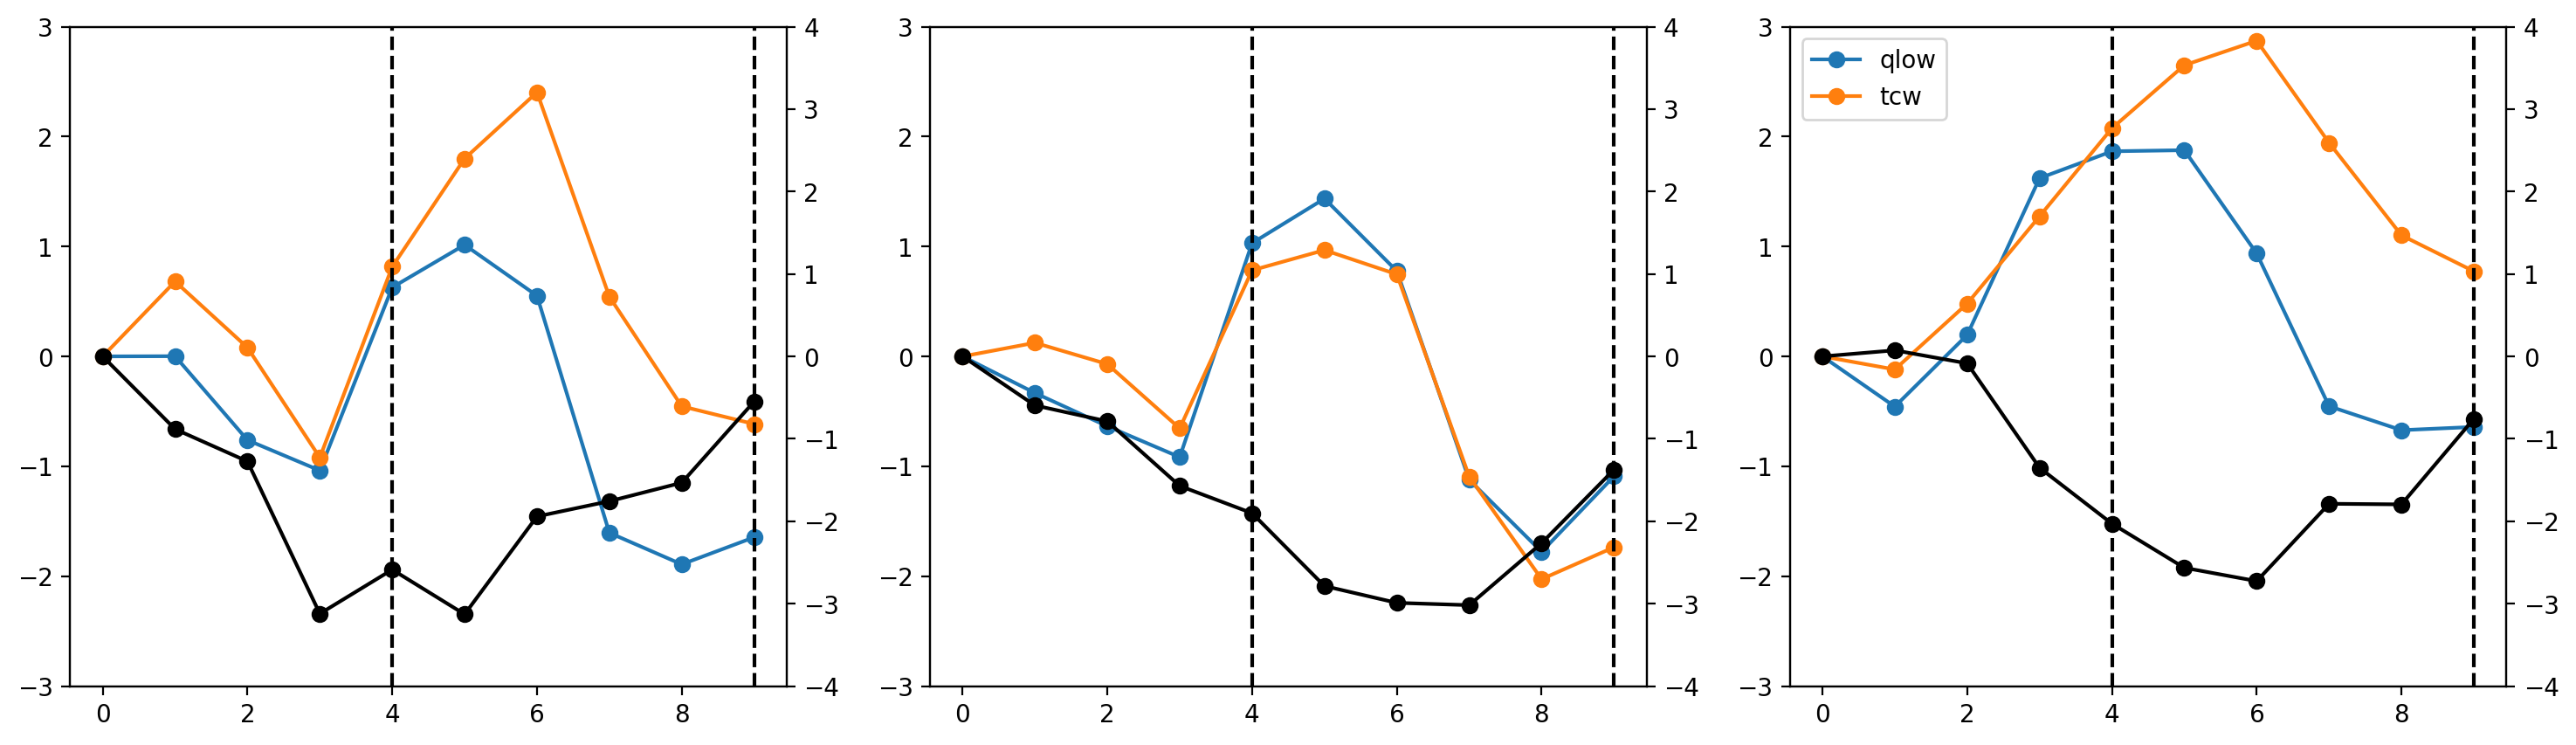

In [161]:
regtag = ['equatorial', 'central', 'southern']
f = plt.figure(figsize=(18,5), dpi=200)

ind = 8+5

for ids, ps in enumerate(qlow_l):
    ax = f.add_subplot(1,3,ids+1)
    
    tc = tcw_l[ids]
    uw = u_l[ids]
    cape = cape_l[ids]
    vv = v_l[ids]
    
    ax.plot(np.arange(len(uw[5::8])),(ps[5::8]-ps.isel(times=5)).values/ np.std((ps[5::8]-ps.isel(times=5)).values),  label='qlow', marker='o')
    ax.plot(np.arange(len(uw[5::8])),(tc[5::8]-tc.isel(times=5)).values/ np.std((tc[5::8]-tc.isel(times=5)).values), label='tcw', marker='o')
    ax2 = ax.twinx()
    ax2.plot(np.arange(len(uw[5::8])),(uw[5::8]-uw.isel(times=5)).values/ np.std((uw[5::8]-uw.isel(times=5)).values), color='k', marker='o')
    
#     ax.axvline(4*8+5, color='grey')
#     ax.axvline(4*8+2, color='k', linestyle='dashed')
    ax.axvline(4, color='k', linestyle='dashed')
    ax.axvline(4+5, color='k', linestyle='dashed')

    ax.set_ylim(-3,3)
    ax2.set_ylim(-4,4)
ax.legend()

In [135]:
np.arange(len(uw[2*8+5::8]))

array([0, 1, 2, 3, 4, 5, 6, 7])

In [143]:
u

<xarray.DataArray 'u' (times: 80)>
array([-2.1964993 , -2.4591122 , -1.7118474 , -0.95847076, -1.5368792 ,
       -1.7888021 , -1.4377396 , -1.4441574 , -2.1546993 , -2.4132705 ,
       -1.593343  , -0.9276806 , -1.5012984 , -1.8090658 , -1.5335662 ,
       -1.6539004 , -2.3333638 , -2.6543822 , -1.9102169 , -1.2792003 ,
       -2.0357904 , -2.4182475 , -2.1275122 , -1.9702426 , -2.482038  ,
       -2.6212122 , -1.7005217 , -0.87392664, -1.1940767 , -1.4355559 ,
       -1.1485348 , -1.1900698 , -1.7674961 , -2.1720455 , -1.53037   ,
       -0.8297292 , -1.2152948 , -1.4283628 , -1.009303  , -0.9898683 ,
       -1.5151341 , -1.752304  , -0.91438353, -0.08732317, -0.44158557,
       -0.570745  , -0.27141213, -0.39283487, -0.9958752 , -1.2393541 ,
       -0.46963024,  0.25380963, -0.31381154, -0.5175323 , -0.25848708,
       -0.40124157, -0.9003636 , -1.1972975 , -0.48378766,  0.20254126,
       -0.29812774, -0.552744  , -0.35715708, -0.52772915, -1.1147099 ,
       -1.5030203 , -0.8653083 , -0.26254037, -0.8183315 , -1.126616  ,
       -0.87721217, -0.986865  , -1.5247586 , -1.8874074 , -1.2229993 ,
       -0.5747291 , -1.0449883 , -1.3440425 , -1.0969365 , -1.1807398 ],
      dtype=float32)
Coordinates:
    level    int32 200
    hour     (times) int64 0 3 6 9 12 15 18 21 0 3 ... 18 21 0 3 6 9 12 15 18 21
Dimensions without coordinates: times

In [ ]:
test = []
testq = []
testv = []
testu = []
testd = []
for ids in np.arange(len(series)):
    
    for vn in series.keys()
    
    mask = np.isnan(series[ids]['wet'].sel(level=850)['q'])

    test.append(series[ids]['wet'].sel(level=750, longitude=slice(alls[1][0],alls[1][1])).mean(['longitude'])['q'].values)
    testq.append(series_tcw[ids]['wet'].values)
    testv.append(series[ids]['wet'].sel(level=850, longitude=slice(alls[1][0],alls[1][1])).mean(['longitude'])['v'].values*-1)
    testu.append(series[ids]['wet'].sel(level=200, longitude=slice(alls[1][0],alls[1][1])).mean(['longitude'])['u'].values)
    testd.append(series[ids]['wet'].sel(level=200).where(mask).mean(['longitude'])['d'].values)